In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("menu.csv")
df.columns = df.columns.str.strip()
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [4]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [5]:
df.shape

(260, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

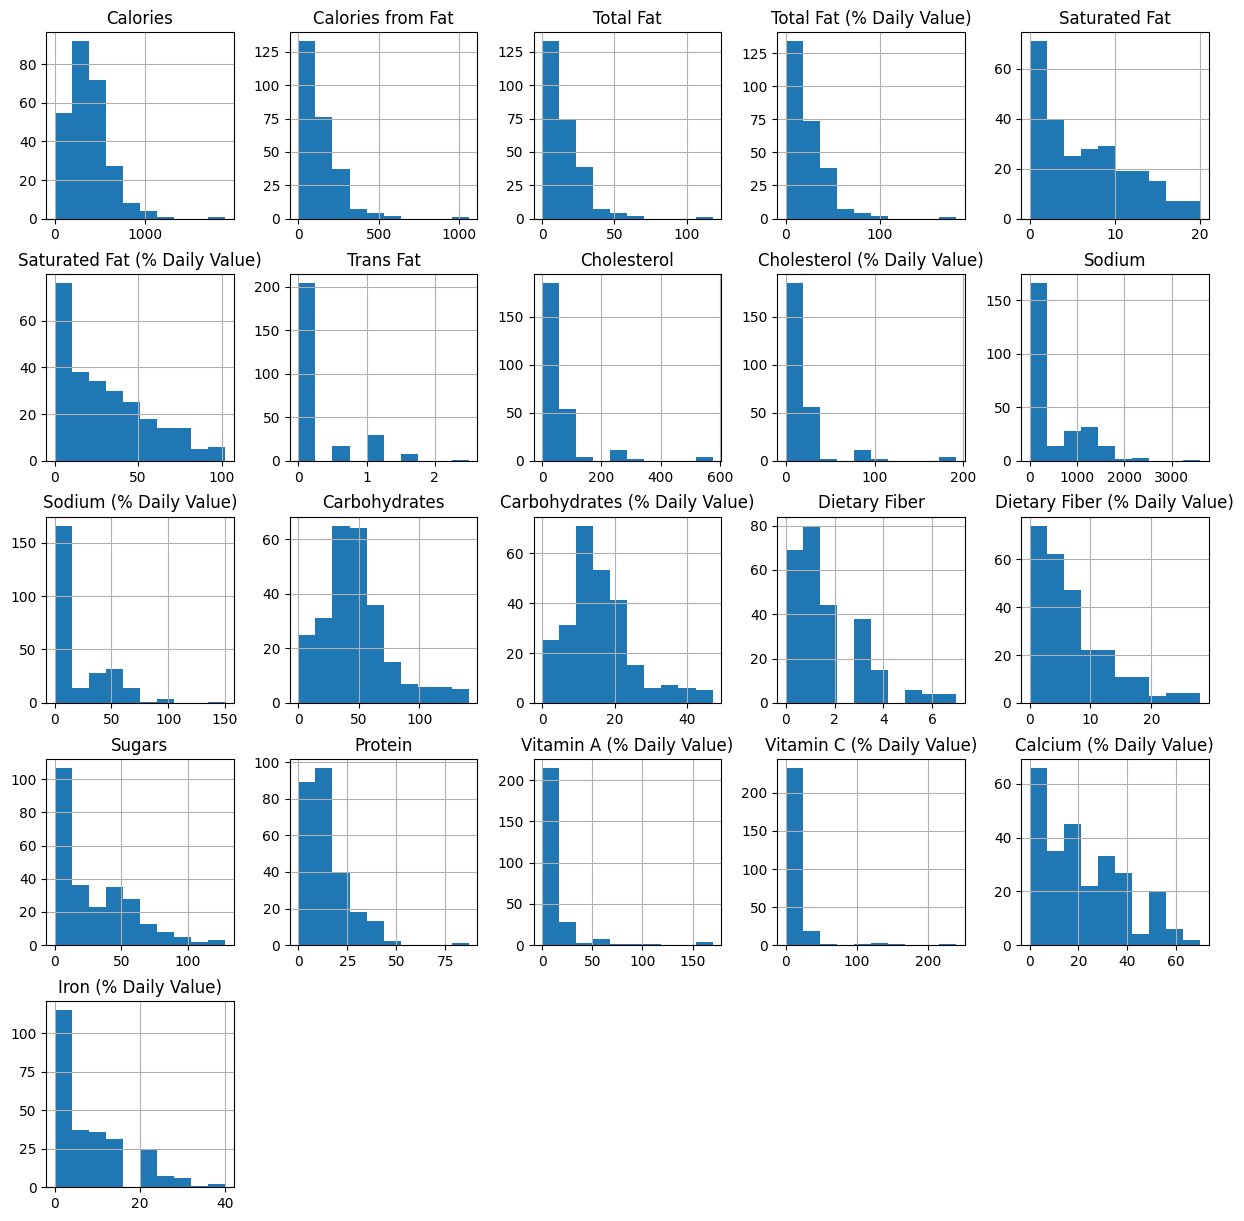

In [7]:
df.hist(figsize=(15,15))
plt.show()


In [8]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [9]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [10]:
df.Item.nunique()

260

### Descriptivr statistics

In [11]:
df_num = df.convert_dtypes().select_dtypes("number")

In [12]:
mean_values = df_num.mean()
median_values = df_num.median()
mode_values = df_num.mode().iloc[0] # Mode might return multiple values, take the first
stand_deviation_values = df_num.std()

print("mean:\n", mean_values)
print("--------------------------------------------------------------------------------")
print("median:\n ", median_values)
print("--------------------------------------------------------------------------------")
print("mode:\n", mode_values)
print("--------------------------------------------------------------------------------")
print("standard deviation:\n" ,stand_deviation_values)
print("--------------------------------------------------------------------------------")

mean:
 Calories                         368.269231
Calories from Fat                127.096154
Total Fat                         14.165385
Total Fat (% Daily Value)         21.815385
Saturated Fat                      6.007692
Saturated Fat (% Daily Value)     29.965385
Trans Fat                          0.203846
Cholesterol                       54.942308
Cholesterol (% Daily Value)       18.392308
Sodium                           495.750000
Sodium (% Daily Value)            20.676923
Carbohydrates                     47.346154
Carbohydrates (% Daily Value)     15.780769
Dietary Fiber                      1.630769
Dietary Fiber (% Daily Value)      6.530769
Sugars                            29.423077
Protein                           13.338462
Vitamin A (% Daily Value)         13.426923
Vitamin C (% Daily Value)          8.534615
Calcium (% Daily Value)           20.973077
Iron (% Daily Value)               7.734615
dtype: float64
------------------------------------------------------

### Analyze the distribution of Calories across different Categories

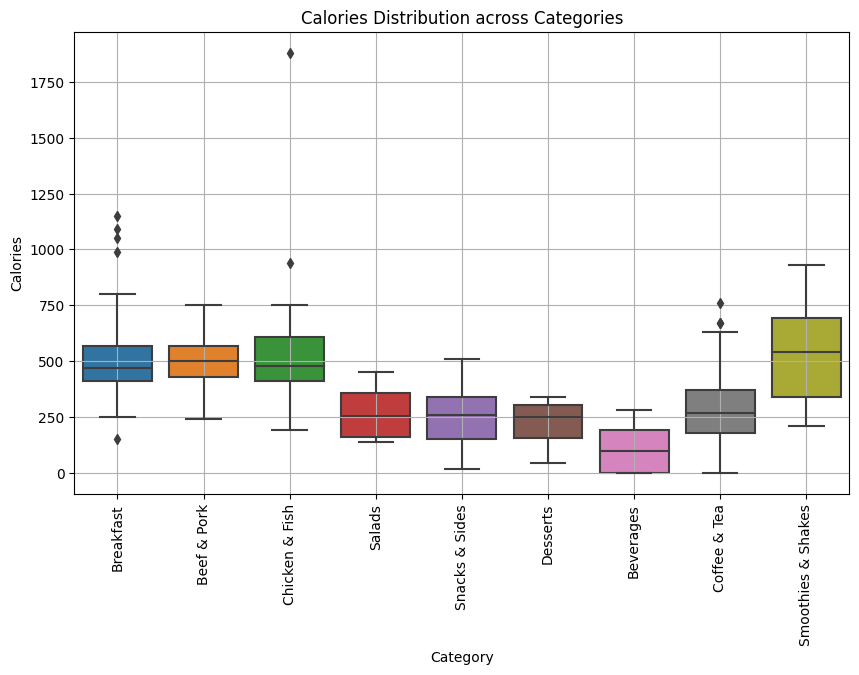

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y="Calories",data=df)
plt.title("Calories Distribution across Categories")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Analyze the correlation between different nutritional values

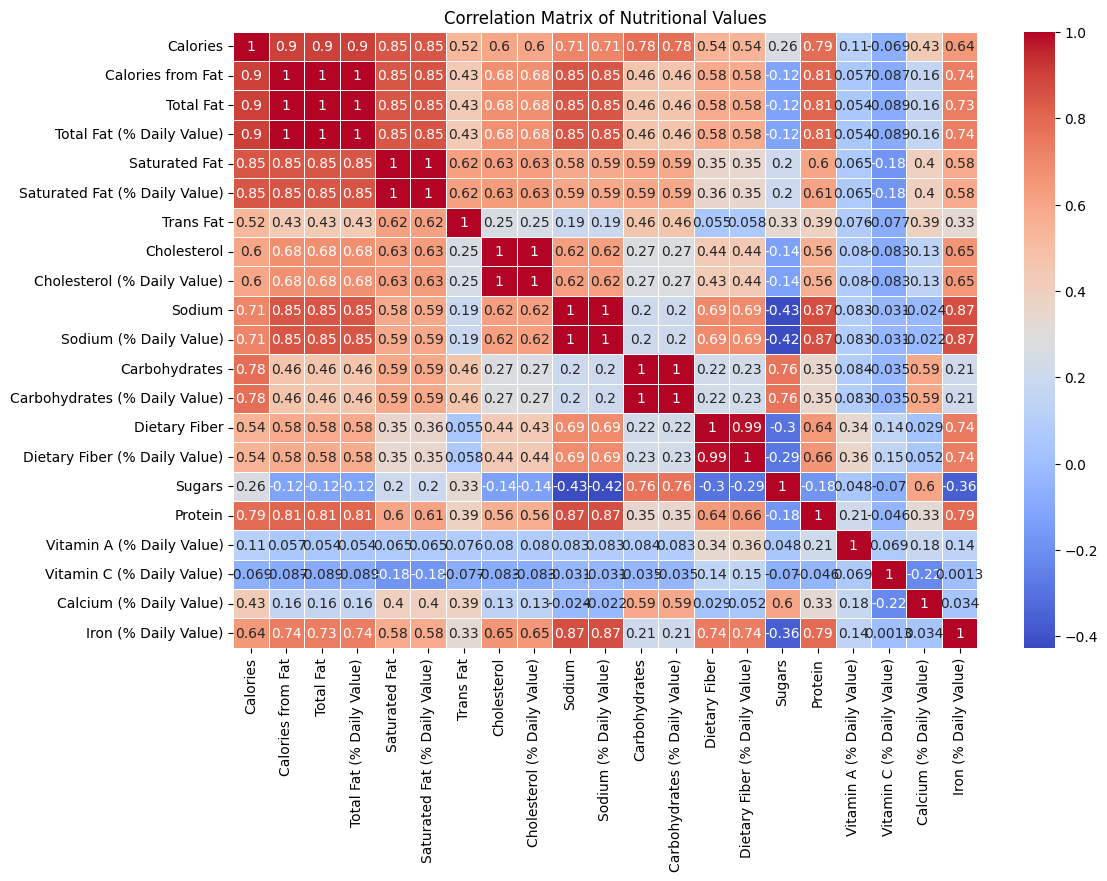

In [14]:
plt.figure(figsize=(12, 8))
cor_matrix = df_num.corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Nutritional Values')
plt.show()

### Average Calories per Category

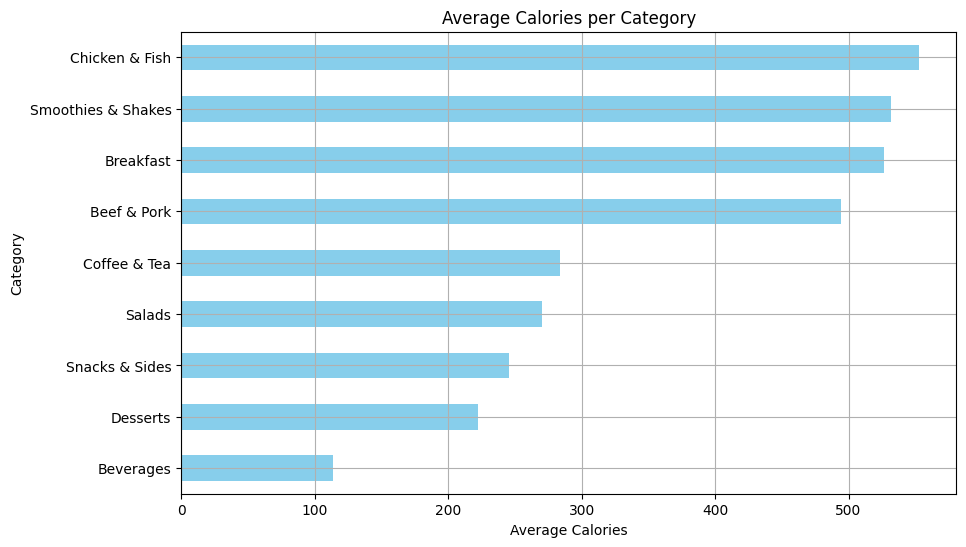

In [15]:
plt.figure(figsize=(10, 6))
avg_calories = df.groupby('Category')['Calories'].mean().sort_values()
avg_calories.plot(kind='barh',color='skyblue')
plt.title('Average Calories per Category')
plt.xlabel('Average Calories')
plt.ylabel('Category')
plt.grid(True)
plt.show()

### Calories vs. Protein

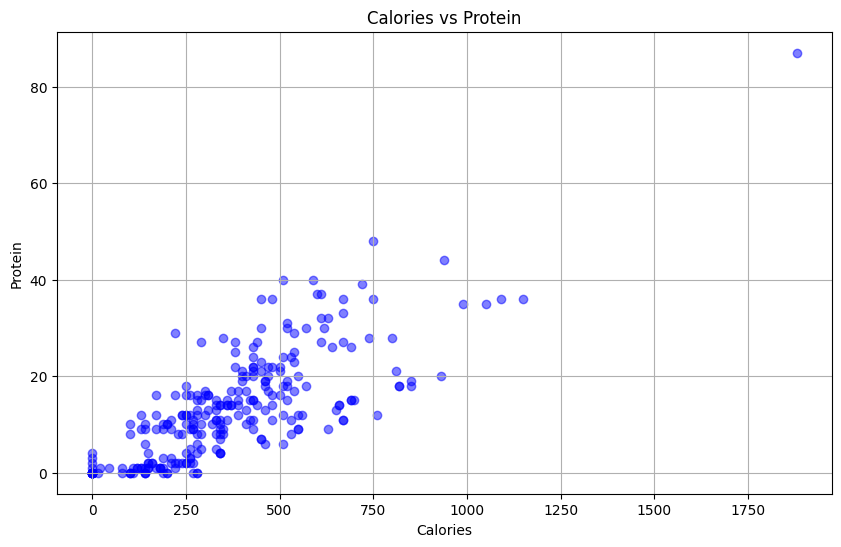

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Calories'],df['Protein'],color='blue', alpha=0.5)
plt.title('Calories vs Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.grid(True)
plt.show()

### Nutritional values

In [17]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

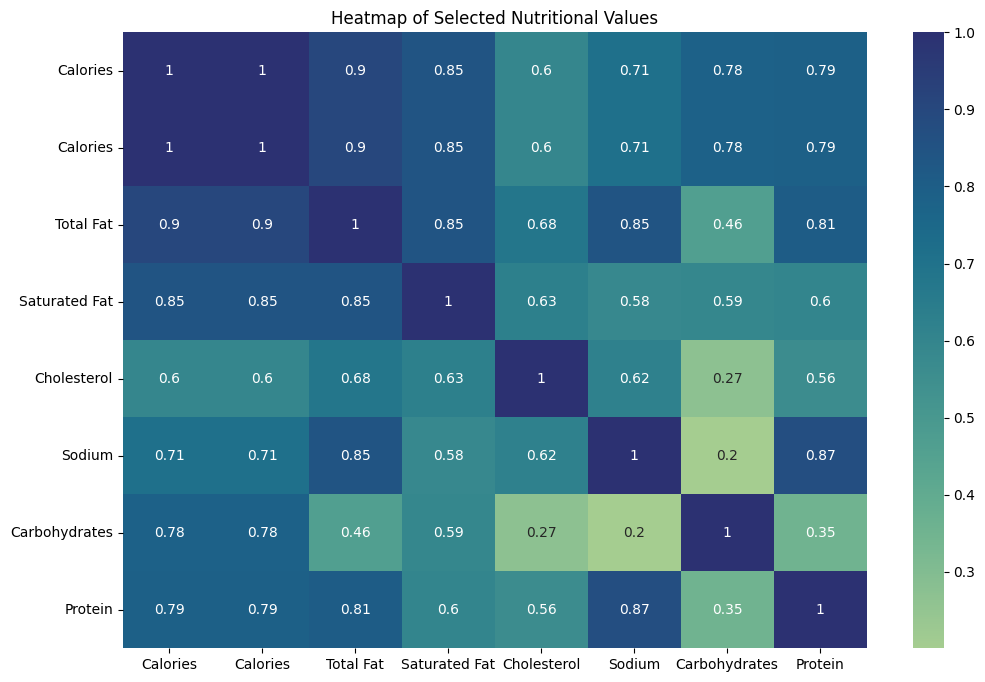

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Calories','Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein']].corr(), annot=True, cmap='crest')
plt.title('Heatmap of Selected Nutritional Values')
plt.show()

#### Based on the analysis: 
- Items in certain categories, such as "Beverages", might have higher calorie counts and could be optimized for health-conscious customers. 
- The strong correlation between certain nutrients (e.g., Total Fat and Calories) suggests that reducing fat content could directly reduce overall caloric intake. 
- Items with high sodium content might need to be highlighted for customers with dietary restrictions.

### Distribution of total fat across item

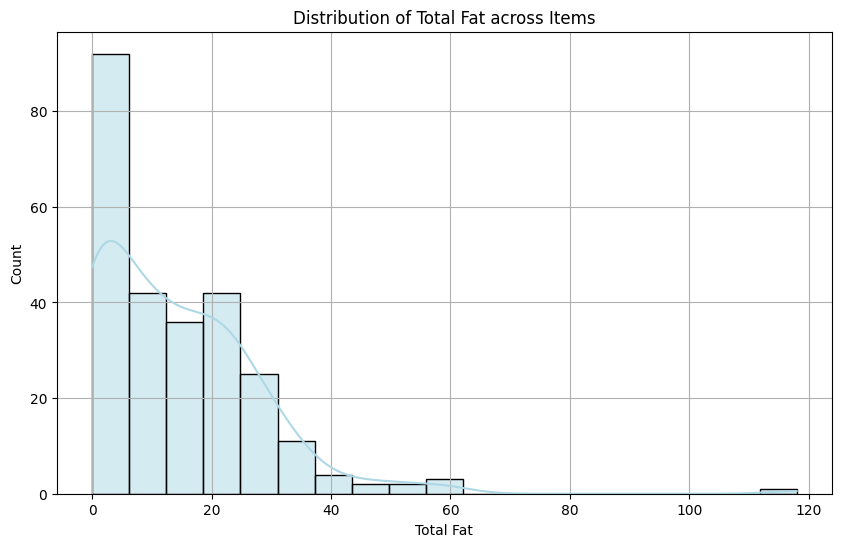

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total Fat'], kde=True, color='lightblue')
plt.title('Distribution of Total Fat across Items')
plt.grid(True)
plt.show()

### Distribution of Sugar across items

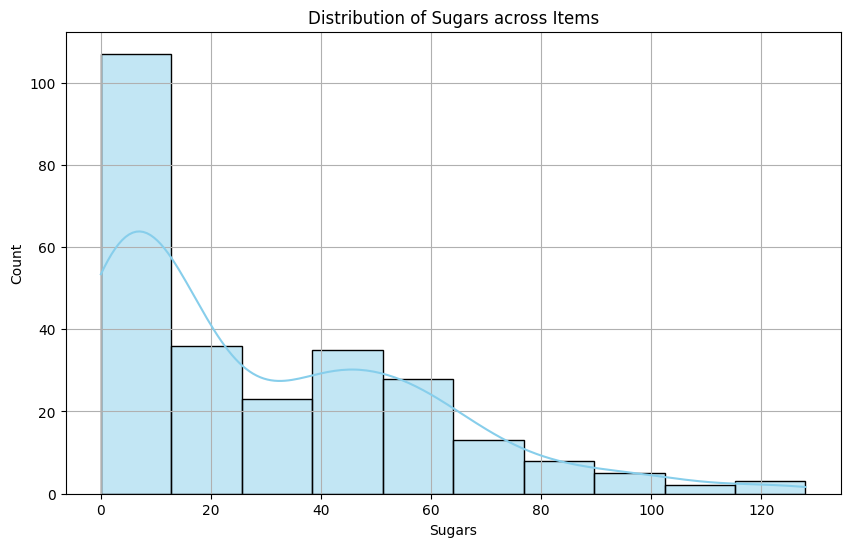

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sugars'], kde=True, color='skyblue')
plt.title('Distribution of Sugars across Items')
plt.grid(True)
plt.show()

### Distribution of Carbohydrates across items

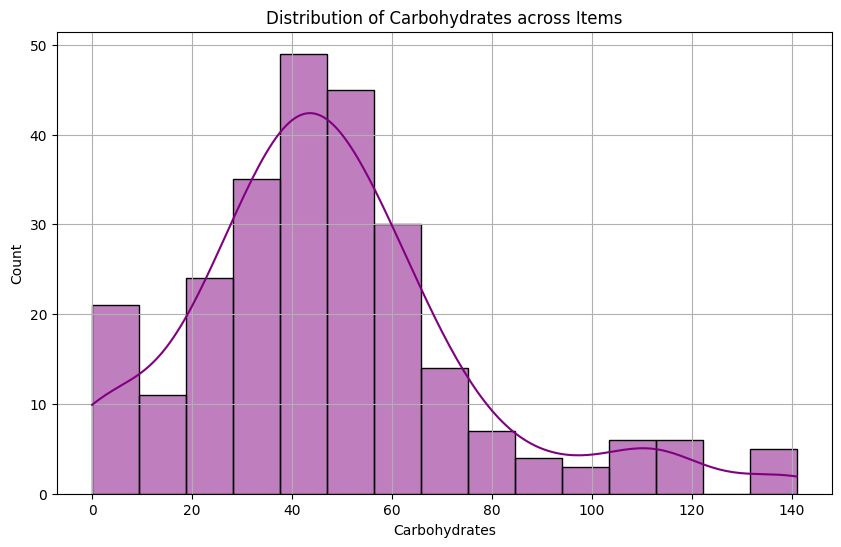

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Carbohydrates'], kde=True, color='purple')
plt.title('Distribution of Carbohydrates across Items')
plt.grid(True)
plt.show()